<a href="https://colab.research.google.com/github/Kristin-Giac/001-streamlit-redaction-improver/blob/master/Auto_insurance_claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get Claims dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
df = pd.read_csv('Insurance claims data.csv')
len(df)

Saving Insurance claims data.csv to Insurance claims data.csv


58592

Review dataset

In [ ]:

df.dtypes


,0
policy_id,object
subscription_length,float64
vehicle_age,float64
customer_age,int64
region_code,object
region_density,int64
segment,object
model,object
fuel_type,object
max_torque,object


In [ ]:
df.columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

Look for duplicate records

In [ ]:
#Looking for duplicate records
key = ['policy_id']

df.fillna(-999).groupby(key)['policy_id'].count().loc[lambda x: x > 1].sort_values(ascending=False)


,policy_id
policy_id,


Review data

In [ ]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


Look for nulls / missing values

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.claim_status.value_counts(normalize=True)

,proportion
claim_status,
0,0.936032
1,0.063968


In [ ]:
df = df[~df.index.duplicated()]

Analyze ncap rating and claims status

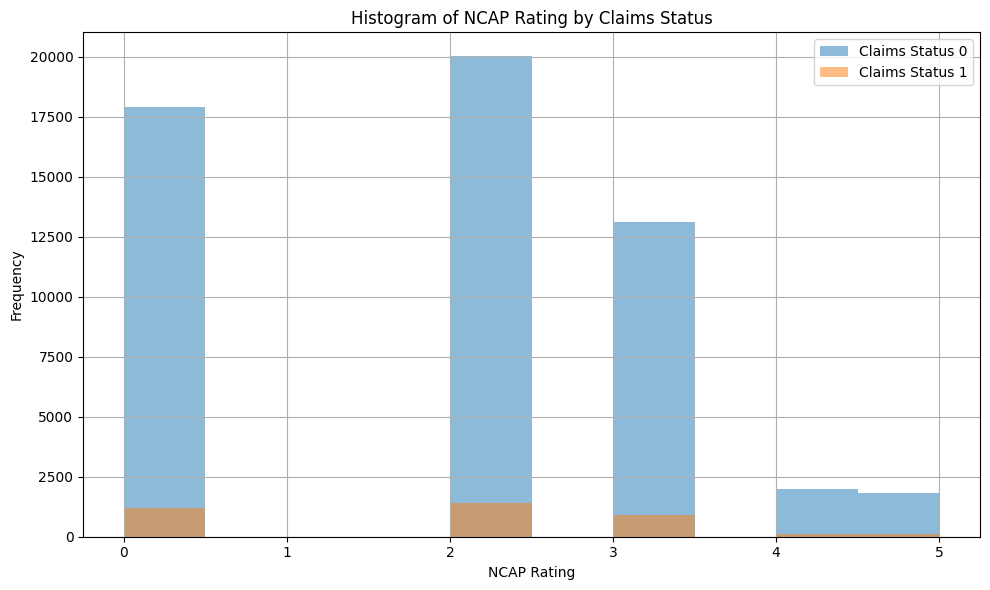

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting histograms of ncap_rating grouped by claims_status
plt.figure(figsize=(10, 6))
for status in [0, 1]:
    subset = df[df['claim_status'] == status]
    plt.hist(subset['ncap_rating'], bins=10, alpha=0.5, label=f"Claims Status {status}")

plt.xlabel('NCAP Rating')
plt.ylabel('Frequency')
plt.title('Histogram of NCAP Rating by Claims Status')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Age vs Claim Status

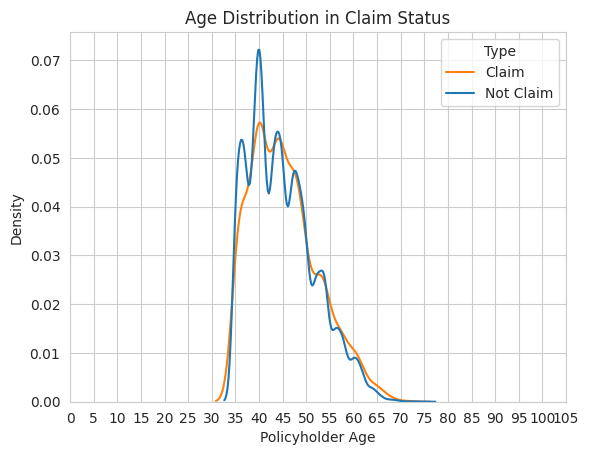

In [ ]:
#age vs claim status
import seaborn as sns
sns.set_style("whitegrid")


ax=sns.kdeplot(x='customer_age',data=df, hue='claim_status', common_norm=False)
ax.set_xlabel('Policyholder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Claim Status')
plt.legend(title='Type', labels=['Claim', 'Not Claim'])

Label Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

Define columns

In [ ]:
df.head()


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# Define column types
numeric_features = ['subscription_length','vehicle_age','customer_age','region_density','ncap_rating','airbags','displacement','cylinder']
binary_features = ['is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','is_brake_assist','is_power_door_locks','is_central_locking','is_parking_sensors','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']
categorical_features = ['region_code', 'model','fuel_type','max_torque','max_power','transmission_type','steering_type']

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Custom transformer to map Yes/No to 1/0
yes_no_transformer = FunctionTransformer(lambda x: x == 'Yes', validate=False)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', yes_no_transformer, binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [ ]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])




In [ ]:
y=df['claim_status']
X=df.drop('claim_status',axis=1)
# Normalizing data
# Getting data prepared for machine learning algorithms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        # scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), # SMOTE handles imbalance
        random_state=42
    ))
])

# Convert y_train to a 1D array if it's a DataFrame or Series
if isinstance(y_train, (pd.DataFrame, pd.Series)):
    y_train = y_train.values.ravel()

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subscription_length',
                                                   'vehicle_age',
                                                   'customer_age',
                                                   'region_density',
                                                   'ncap_rating', 'airbags',
                                                   'displacement',
                                                   'cylinder']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function <lambda> at 0x7dc43259eb60>),
                                                  ['is_adjustable_steering',
                                                   'is_tpms',
                                                   'is_parking_sensors',
                                                   'is_parking_came...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Removed redundant train/test split
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subscription_length',
                                                   'vehicle_age',
                                                   'customer_age',
                                                   'region_density',
                                                   'ncap_rating', 'airbags',
                                                   'displacement',
                                                   'cylinder']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function <lambda> at 0x7ce5afce7100>),
                                                  ['is_adjustable_steering',
                                                   'is_tpms',
                                                   'is_parking_sensors',
                                                   'is_parking_came...
                                                   'is_brake_assist',
                                                   'is_power_door_locks',
                                                   'is_central_locking',
                                                   'is_parking_sensors',
                                                   'is_driver_seat_height_adjustable',
                                                   'is_day_night_rear_view_mirror',
                                                   'is_ecw',
                                                   'is_speed_alert']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region_code', 'model',
                                                   'fuel_type', 'max_torque',
                                                   'max_power',
                                                   'transmission_type',
                                                   'steering_type'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9359160337912791


Feature importance

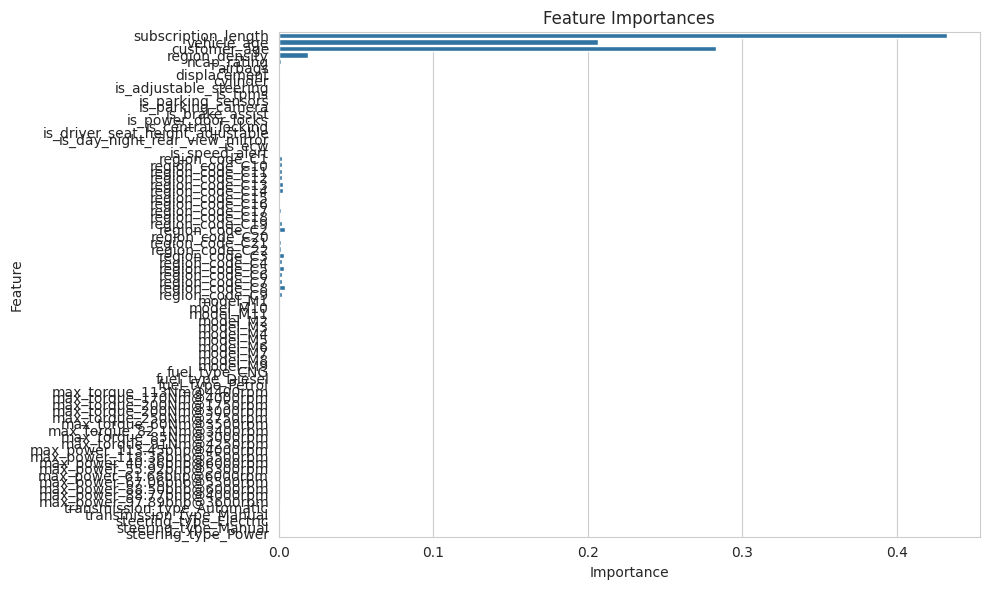

In [ ]:
cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
#ord_columns = ordinal_features
bin_columns = binary_features
num_columns = numeric_features
all_features = list(num_columns) + list(bin_columns) + list(cat_columns)

importances = pipeline.named_steps['classifier'].feature_importances_

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=all_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top 5 features

                feature  importance
0   subscription_length    0.432348
2          customer_age    0.283104
1           vehicle_age    0.206900
3        region_density    0.018730
40       region_code_C8    0.003916


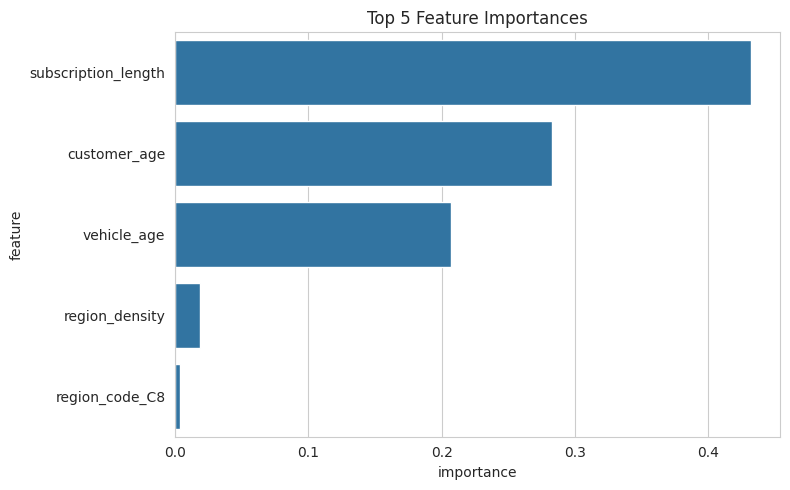

In [ ]:
import numpy as np
import pandas as pd

# Create a DataFrame of features and importances
feature_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
})

# Sort and get top 5
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(5)

# Print
print(top_features)

# Plot top 5
plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 5 Feature Importances')
plt.tight_layout()
plt.show()


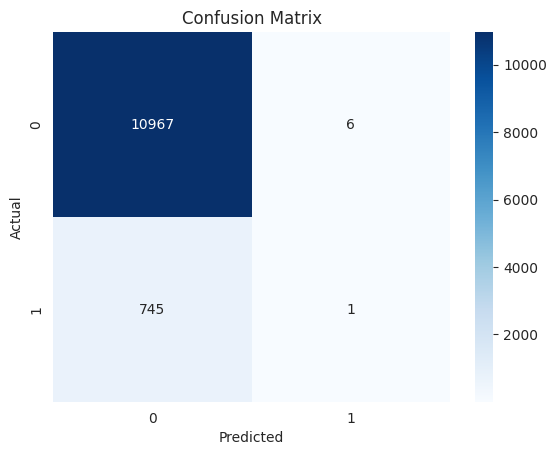


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10973
           1       0.14      0.00      0.00       746

    accuracy                           0.94     11719
   macro avg       0.54      0.50      0.48     11719
weighted avg       0.89      0.94      0.91     11719

Accuracy: 0.9359160337912791
Precision: 0.14285714285714285
Recall: 0.0013404825737265416
F1 Score: 0.0026560424966799467


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score )

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Or print metrics individually
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

In [ ]:
y=df['claim_status']
X=df.drop('claim_status',axis=1)
x= df[['subscription_length','customer_age','vehicle_age','region_density']].copy()
x.head()

,subscription_length,customer_age,vehicle_age,region_density
0,9.3,41,1.2,8794
1,8.2,35,1.8,27003
2,9.5,44,0.2,8794
3,5.2,44,0.4,73430
4,10.1,56,1.0,5410


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])




In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Custom transformer to map Yes/No to 1/0
yes_no_transformer = FunctionTransformer(lambda x: x == 'Yes', validate=False)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', yes_no_transformer, binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [ ]:
y=df['claim_status']
X=df.drop('claim_status',axis=1)
# Normalizing data
# Getting data prepared for machine learning algorithms
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Normalizing data
# Getting data prepared for machine learning algorithms
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = x.columns
d = scaler.fit_transform(x)
x_norm = pd.DataFrame(d, columns=names)
x_norm.head()

,subscription_length,customer_age,vehicle_age,region_density
0,0.664286,0.150,0.06,0.116270
1,0.585714,0.000,0.09,0.365231
2,0.678571,0.225,0.01,0.116270
3,0.371429,0.225,0.02,1.000000
4,0.721429,0.525,0.05,0.070003


In [ ]:
# Loading packages for Decision Tree algorithm and splitting dataset into test and train
# For predictions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=12)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Loading packages for logistic regression and discriminant analysis
# For predictions
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=12)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

In [ ]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
acc_lr=accuracy_score(y_test,y_pred_lr)
print('Confusion Matrix (Logistic Regression):\n',cm_lr)
print('Accuracy (Logistic Regression:', acc_lr)

Confusion Matrix (Logistic Regression):
 [[13708     0]
 [  940     0]]
Accuracy (Logistic Regression: 0.9358274167121792


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda=lda.predict(X_test)

In [ ]:
cm_lda=confusion_matrix(y_test,y_pred_lda)
acc_lda=accuracy_score(y_test,y_pred_lda)
print('Confusion Matrix (Linear Discriminant Analysis):\n',cm_lda)
print('Accuracy (Linear Discriminant Analysis:', acc_lda)

Confusion Matrix (Linear Discriminant Analysis):
 [[13708     0]
 [  940     0]]
Accuracy (Linear Discriminant Analysis: 0.9358274167121792


In [ ]:
#Modifications to Manage Imbalanced Data (Fraud vs Non Fraud)
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(x_norm, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

,count
claim_status,
0,54844
1,54844


In [ ]:
X_smote.head()


,subscription_length,customer_age,vehicle_age,region_density
0,0.664286,0.150,0.06,0.116270
1,0.585714,0.000,0.09,0.365231
2,0.678571,0.225,0.01,0.116270
3,0.371429,0.225,0.02,1.000000
4,0.721429,0.525,0.05,0.070003


In [ ]:
# Removed incorrect train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=12)

In [ ]:
y_train


array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
lr = LogisticRegression()
#lr.fit(X_train, y_train)
lr.fit(X_train, y_train.values.ravel())

y_pred_lr=lr.predict(X_test)

In [ ]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
acc_lr=accuracy_score(y_test,y_pred_lr)
print('Confusion Matrix (Logistic Regression):\n',cm_lr)
print('Accuracy (Logistic Regression:', acc_lr)

Confusion Matrix (Logistic Regression):
 [[7651 6013]
 [5513 8245]]
Accuracy (Logistic Regression: 0.5796805484647364


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        # scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), # SMOTE handles imbalance
        random_state=42
    ))
])

# Convert y_train to a 1D array if it's a DataFrame or Series
if isinstance(y_train, (pd.DataFrame, pd.Series)):
    y_train = y_train.values.ravel()

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subscription_length',
                                                   'vehicle_age',
                                                   'customer_age',
                                                   'region_density',
                                                   'ncap_rating', 'airbags',
                                                   'displacement',
                                                   'cylinder']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function <lambda> at 0x7dc43259eb60>),
                                                  ['is_adjustable_steering',
                                                   'is_tpms',
                                                   'is_parking_sensors',
                                                   'is_parking_came...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Removed line that was redefining X_train
#y_train
X_train = X_train.iloc[:, :4]


#X_train
#X_train.head()
x=X_train

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

pipeline.fit(X, y)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Preprocessing definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # Add other transformers here (binary, ordinal) if needed
    ]
)

# 2. Fit and transform X (outside the pipeline because SMOTE needs it)
X_processed = preprocessor.fit_transform(X)

# 3. Get feature names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + binary_features + list(categorical_feature_names)

# 4. Apply SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_processed, y)



# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# 7. Fit XGBoost directly on SMOTE-balanced, preprocessed data
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:02:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.931587776238057
Precision: 0.9803340738912203
Recall: 0.8791971072245591
F1 Score: 0.9270152505446623


In [ ]:
✅ 1. Accuracy (93.16%)
Overall, 93.16% of predictions were correct (both claims and no-claims).

Sounds great — but remember, accuracy can be misleading if the dataset is imbalanced (e.g., if 90% are no-claim cases, a model predicting no-claim all the time would still be 90% accurate).

✅ 2. Precision (98.03%)
Of all the predicted claims, 98% were actual claims.

This is very strong precision — it means your model is rarely flagging a false positive, which is great if acting on false positives is costly (e.g., unnecessary fraud investigation).

✅ 3. Recall (87.92%)
Of all the actual claims, 88% were correctly predicted as claims.

This means your model misses about 12% of real claims — which is pretty solid, but you might want to improve this if catching every claim is critical (like in risk scoring or fraud detection).

✅ 4. F1 Score (92.70%)
The F1 score balances precision and recall. Your model is strong on both fronts.

This shows the model is not only accurate, but it’s making balanced, high-quality predictions — great for production use.

🧠 Business Interpretation (Insurance Claims)
Metric	Business Value
High Precision	You won’t waste time/resources flagging customers who didn’t actually file claims.
High Recall	You’re catching nearly all actual claims — key for accurate loss modeling or fraud detection.
High F1	Your model has strong overall performance for both identifying and correctly flagging claims.

✅ Summary
You’ve trained a very well-performing model — likely suitable for deployment, especially if you're balancing business costs of false positives and false negatives.

Let me know if you'd like to:

Visualize precision-recall or ROC curve

Adjust threshold for recall vs. precision

Export misclassified cases for review









Ask ChatGPT
